<a href="https://colab.research.google.com/github/khalilkabara/Kaggle-Dog-Breed-Identification/blob/master/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-To-End Multi Class Dog Breed Classification (On Google Colab)

> This project and the entire notebook was built on and is intended to run Google Colab with  GPU config.

> The version of Tensor Flow used for this project is 2.2.0-rc4

> The version of Tensorflow Hub used is 0.8.0

> Other libraries used include numpy, pandas and matplotlib.

> A copy of this notebook is hosted on github at https://github.com/khalilkabara/Kaggle-Dog-Breed-Identification/blob/master/Dog_Breed_Identification.ipynb

### Workflow

### 1. Problem Overview:
**Summary:** Identify the breed of a dog given it's image

In this playground competition, you are provided a strictly canine subset of ImageNet in order to practice fine-grained image categorization. How well you can tell your Norfolk Terriers from your Norwich Terriers? With 120 breeds of dogs and a limited number training images per class, you might find the problem more, err, ruff than you anticipated.

This problem was hosted on Kaggle at https://www.kaggle.com/c/dog-breed-identification/

### 2. Data:
You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo.

More at: https://www.kaggle.com/c/dog-breed-identification/data

### 3. Modelling
For this peoject, we are going to use Google's Tensorflow

### 4. Evaluation
Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

Submission File
For each image in the test set, you must predict a probability for each of the different breeds. The file should contain a header and have the following format:

id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.

**Multi-Class-Log-Loss:** Multi-class logarithmic loss function per class. ... The cost function F measures the distance between two probability distributions, i.e. how similar is the distribution of actual labels and classifier probabilities. Hence, values close to zero are preferred. More at https://stats.stackexchange.com/questions/113301/multi-class-logarithmic-loss-function-per-class

More at: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

### 5. Features
You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo.

More at: https://www.kaggle.com/c/dog-breed-identification/data

## 1.0 Import Libraries And Get Workspace Ready
> Import TensorFlow into colab

> Ensure we are running TF v 2.0 and above

> Import Tensorflow Hub

> Ensure we are running on a GPU

In [0]:
# Import TensorFlow into colab

import tensorflow as tf

In [143]:
# Check TF version

print("TF version: ", tf.__version__)

TF version:  2.2.0-rc4


In [144]:
# Import Tensorflow Hub

import tensorflow_hub as hub
print("TF Hub version: ", hub.__version__)

TF Hub version:  0.8.0


In [145]:
# Check if GPU is available

print("GPU", "available." if tf.config.list_physical_devices("GPU") else "not available")

# If GPU not available, so setup GPU in notebook settings under toolbar > runtime > change runtime type

GPU available.


## 2.0 Import Data

In [0]:
# Import Data Into Colab (Or Use Google Drive As Indicated In The Next Cell)

# !wget -x --load-cookies cookies.txt "https://www.kaggle.com/c/7327/download-all" -O data.zip
# !unzip data.zip

In [0]:
# Authorize Google Drive Mount So That We Can Access Google Drive Data From Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# Unzip Files In Google Drive

# !unzip "/content/drive/My Drive/SWDEV/Data/Dog Breed Identification - Kaggle/data.zip" -d "/content/drive/My Drive/SWDEV/Data/Dog Breed Identification - Kaggle/data_unzipped"

## 3.0 Get Data Ready
Turn data into tensors for use with Tensorflow

**NOTE:** We have stored all data in google drive. Alter path_to_files variable to point to the drive location where you have stored your data

### 3.1 Create Helper Strings And Import Pandas

In [0]:
# Create Helper Strings That Point To File Paths Since Paths Are Pretty Long

path_to_files = "drive/My Drive/SWDEV/Data/Dog Breed Identification - Kaggle/data_unzipped/"

test_data_path = path_to_files + "test/"
train_data_path = path_to_files + "train/"
labels_path = path_to_files + "labels.csv"
sample_submission_path = path_to_files + "sample_submission.csv"

In [0]:
# Import Pandas

import pandas as pd

### 3.2 Get And Explore Labels Data

In [148]:
# Check out data labels

labels_csv = pd.read_csv(labels_path)
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [149]:
# Describe labels

labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,7d94bf0b3433fbcdb34f7c13979ef0e6,scottish_deerhound
freq,1,126


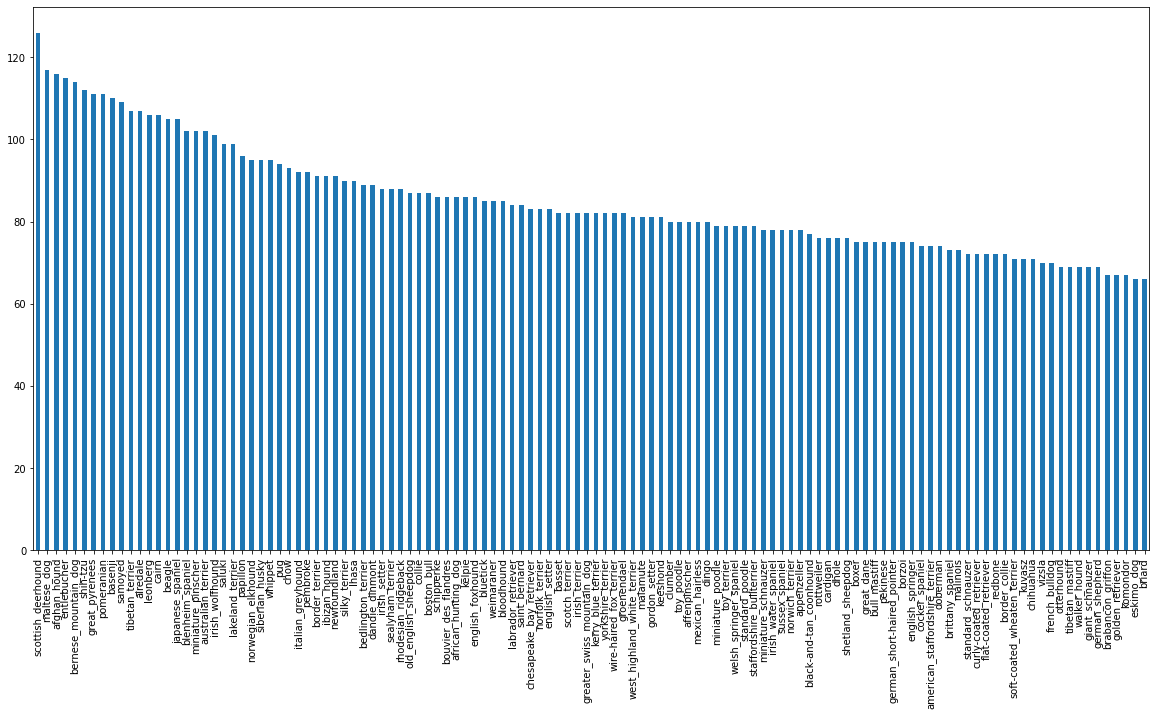

In [150]:
# Visuaize the different breeds that are in our data

labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10));

### 3.3 Get And Explore Images Data

In [151]:
# check if number of labels matches number of filenames

import os

filenames = [train_data_path + fname + ".jpg" for fname in labels_csv['id']]

if len(os.listdir(train_data_path)) == len(filenames):
  print("Number of labels matches number of files. You may proceed")
else:
  print("Filenames do NOT match number of files in directory. Check data directories before proceeding")

Number of labels matches number of files. You may proceed


In [0]:
# View an image
# Create a handy function for viewing images given image id's

from IPython.display import Image

def view_image_by_id(image_id, directory='train'):
  """
  A handy function for viewing dog image files in our notebook. Expects image_id
  """
  if directory == 'test':
    return Image(test_data_path + image_id + ".jpg")
  else:
    return Image(train_data_path + image_id + ".jpg")

In [0]:
# Create another function for viewing train data images given an index

def view_image_by_index(index=0):
  if index <= len(filenames):
    return Image(filenames[index])
  else:
    print(f"There is no Image at index {index}. Returning first image")
    return Image(filenames[0])

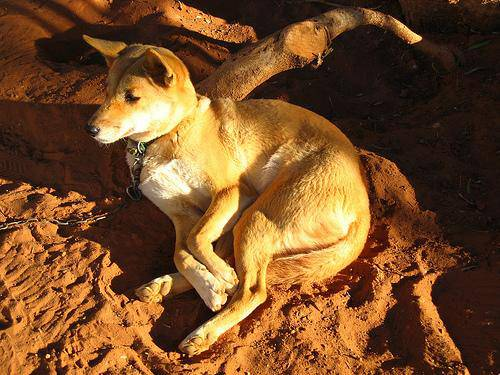

In [154]:
# View a dog image by id

view_image_by_id("001513dfcb2ffafc82cccf4d8bbaba97")

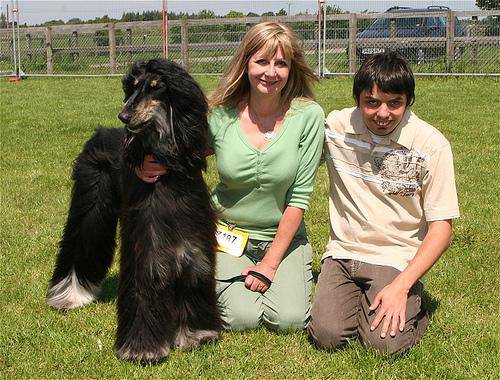

In [155]:
# View a dog image by index (from train data)
view_image_by_index(1200)

### 3.4 Convert Labels Into Numeric Values Using Numpy

In [156]:
# Convert labels into numbers

import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [157]:
# check if number of labels matches number of filenames

if len(labels) == len(filenames):
  print("Number of labels matches number of files. You may proceed")
else:
  print("Number of labels do NOT match number of files. Check data directories before proceeding")

Number of labels matches number of files. You may proceed


In [158]:
# Find the unique label values. Print first 20

unique_breeds = np.unique(labels)
unique_breeds[:20]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull'], dtype=object)

In [159]:
#Turn every label into a boolean array. View only first otwo

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
# One hot encode boolean arrays into integers

### 3.5 Split Training Data into Train And Valid Dataset
Since the dataset from kaggle does not come with a validation set, we are going to create our's.

We are goint to start off experimenting with 1000 images and increase as needed.

In [0]:
# Set up x and y variables

x = filenames
y = boolean_labels

In [0]:
# Set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000, step: 1000}

In [169]:
# Split data into train and validation using train_test_split

from sklearn.model_selection import train_test_split

# Do split into training and validation sets of total size equals to NUM_IMAGES

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2, 
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

### 3.6 Convert All Data Into Tensors